In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-z))

def one_hot_encode(y, num_classes):
    """Convert labels to one-hot encoding"""
    encoded = np.zeros((y.size, num_classes))
    encoded[np.arange(y.size), y] = 1
    return encoded

def softmax(z):
    """Softmax for multi-class classification"""
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [10]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        """Train using gradient descent"""
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))
        
        # Initialize parameters
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros((1, num_classes))
        
        # One-hot encode labels
        y_one_hot = one_hot_encode(y, num_classes)
        
        # Gradient Descent
        for i in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = softmax(linear_model)
            
            # Gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y_one_hot))
            db = (1 / num_samples) * np.sum(y_pred - y_one_hot, axis=0, keepdims=True)
            
            # Update
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            if (i+1) % 100 == 0:
                loss = -np.mean(np.sum(y_one_hot * np.log(y_pred + 1e-8), axis=1))
                print(f"Epoch {i+1}/{self.epochs}, Loss: {loss:.4f}")
    
    def predict(self, X):
        """Predict labels"""
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = softmax(linear_model)
        return np.argmax(y_pred, axis=1)


In [11]:
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision_score(y_true, y_pred, num_classes):
    precision = []
    for c in range(num_classes):
        tp = np.sum((y_pred == c) & (y_true == c))
        fp = np.sum((y_pred == c) & (y_true != c))
        precision.append(tp / (tp + fp + 1e-8))
    return np.mean(precision)

def recall_score(y_true, y_pred, num_classes):
    recall = []
    for c in range(num_classes):
        tp = np.sum((y_pred == c) & (y_true == c))
        fn = np.sum((y_pred != c) & (y_true == c))
        recall.append(tp / (tp + fn + 1e-8))
    return np.mean(recall)

def f1_score(y_true, y_pred, num_classes):
    prec = precision_score(y_true, y_pred, num_classes)
    rec = recall_score(y_true, y_pred, num_classes)
    return 2 * (prec * rec) / (prec + rec + 1e-8)

In [12]:
def array_to_image(arr):
    """Convert a 784-length array to a 28x28 grayscale image"""
    image = arr.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
    return image

In [13]:
def predict_and_show(array_784, model):
    """Takes array of 784 pixels + trained model → shows image + predicted label"""
    image = array_to_image(array_784)
    pred = model.predict(array_784.reshape(1, -1))
    print(f"Predicted Label: {pred[0]}")
    return image, pred[0]


Epoch 100/500, Loss: 0.6065
Epoch 200/500, Loss: 0.4855
Epoch 300/500, Loss: 0.4359
Epoch 400/500, Loss: 0.4072
Epoch 500/500, Loss: 0.3880

Evaluation Metrics (on Validation Set):
Accuracy:  0.8974
Precision: 0.8963
Recall:    0.8949
F1 Score:  0.8956

Sample Test Predictions: [2 0 9 9 3 7 0 3 0 3]

Predictions saved to mnist_predictions.csv


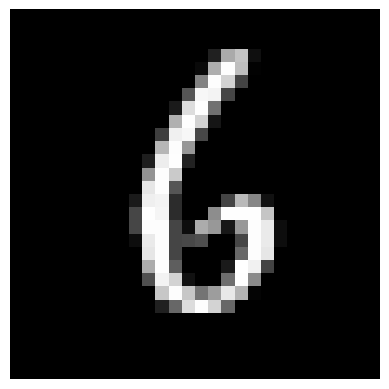

Predicted Label: 6


(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [15]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

# Train data has labels
X = train.drop(columns=['label']).values / 255.0
y = train['label'].values

# Split training data (use part as validation set)
split_ratio = 0.8
split_idx = int(split_ratio * len(X))

X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

# Test data (no labels)
X_test = test.values / 255.0

# Train model
model = LogisticRegressionScratch(lr=0.1, epochs=500)
model.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = model.predict(X_val)
num_classes = len(np.unique(y))

acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred, num_classes)
rec = recall_score(y_val, y_val_pred, num_classes)
f1 = f1_score(y_val, y_val_pred, num_classes)

print("\nEvaluation Metrics (on Validation Set):")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Predict labels for test.csv (no ground truth)
test_predictions = model.predict(X_test)
print("\nSample Test Predictions:", test_predictions[:10])

# Optional: Save results
submission = pd.DataFrame({'ImageId': np.arange(1, len(test_predictions) + 1),
                           'Label': test_predictions})
submission.to_csv("mnist_predictions.csv", index=False)
print("\nPredictions saved to mnist_predictions.csv")

# Test on one random image from validation set
sample = X_val[5]
predict_and_show(sample, model)